In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Data Cleaning

#### loading data

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
feature_df = pd.read_csv('data/features.csv')
stores_df = pd.read_csv('data/stores.csv')

#### merge the datasets

In [3]:
feature_store_df = feature_df.merge(stores_df, on = "Store", how = "left")

In [4]:
full_train_df = train_df.merge(feature_store_df, on= ["Store","Date","IsHoliday"], how = "left")
full_test_df = test_df.merge(feature_store_df, on= ["Store","Date","IsHoliday"], how = "left")

#### check the data type of each column

In [5]:
full_train_df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

In [6]:
full_train_df['IsHoliday'] = full_train_df['IsHoliday'].astype('int64')
full_test_df['IsHoliday'] = full_test_df['IsHoliday'].astype('int64')

In [7]:
full_train_df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday         int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

#### check the number of NA values in each column

In [8]:
full_train_df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [9]:
full_test_df.isna().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
dtype: int64

MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA. We are having too many null values in MarkDown1-5, we will have to drop these columns.

Also note that there are many null values in CPI and Unemplyment in test set. We might also have to drop these features.

#### create new features: year, and week of year

In [10]:
full_train_df.Date = pd.to_datetime(full_train_df.Date)
full_test_df.Date = pd.to_datetime(full_test_df.Date)

full_train_df['Year'] = full_train_df.Date.dt.year
full_test_df['Year'] = full_test_df.Date.dt.year

full_train_df['Week'] = full_train_df.Date.dt.week
full_test_df['Week'] = full_test_df.Date.dt.week

<ipython-input-10-ea3ef0b2d083>:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  full_train_df['Week'] = full_train_df.Date.dt.week
<ipython-input-10-ea3ef0b2d083>:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  full_test_df['Week'] = full_test_df.Date.dt.week


In [11]:
full_train_df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
Year                 0
Week                 0
dtype: int64

#### one hot encoding

In [12]:
full_train_df[["Type_A",'Type_B','Type_C']] = pd.get_dummies(full_train_df['Type'])
full_test_df[["Type_A",'Type_B','Type_C']] = pd.get_dummies(full_test_df['Type'])

### Exploratory Data Analysis

In [13]:
# Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
# Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
# Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [14]:
super_bowl = ['2010-02-12', '2011-02-11','2012-02-10','2013-02-08']
labor_day = ['2010-09-10', '2011-09-09', '2012-09-07','2013-09-06']
thanksgiving = ['2010-11-26','2011-11-25','2012-11-23','2013-11-29']
christmas = ['2010-12-31','2011-12-30','2012-12-28', '2013-12-27' ]

data = {'holiday':["super_bowl"]* 4 + ["labor_day"]*4 + ['thanksgiving'] *4 + ['christmas']*4, 
        'Date':super_bowl + labor_day+ thanksgiving + christmas}
holiday = pd.DataFrame(data)

In [15]:
holiday.Date = pd.to_datetime(holiday.Date)
holiday['Year'] = holiday.Date.dt.year
holiday['Week'] = holiday.Date.dt.week

<ipython-input-15-088d5b4f154b>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  holiday['Week'] = holiday.Date.dt.week


In [16]:
holiday

,holiday,Date,Year,Week
0,super_bowl,2010-02-12,2010,6
1,super_bowl,2011-02-11,2011,6
2,super_bowl,2012-02-10,2012,6
3,super_bowl,2013-02-08,2013,6
4,labor_day,2010-09-10,2010,36
5,labor_day,2011-09-09,2011,36
6,labor_day,2012-09-07,2012,36
7,labor_day,2013-09-06,2013,36
8,thanksgiving,2010-11-26,2010,47
9,thanksgiving,2011-11-25,2011,47


Check weekly sales per year

In [17]:
sales_2010 = full_train_df[full_train_df['Year'] == 2010]['Weekly_Sales'].groupby(full_train_df['Week']).mean()
sales_2011 = full_train_df[full_train_df['Year'] == 2011]['Weekly_Sales'].groupby(full_train_df['Week']).mean()
sales_2012 = full_train_df[full_train_df['Year'] == 2012]['Weekly_Sales'].groupby(full_train_df['Week']).mean()

In [18]:
holiday_2010 = holiday[holiday['Year'] == 2010]['Week']
holiday_2011 = holiday[holiday['Year'] == 2011]['Week']
holiday_2012 = holiday[holiday['Year'] == 2012]['Week']
holiday_2013 = holiday[holiday['Year'] == 2013]['Week']

In [19]:
holiday_2012

2      6
6     36
10    47
14    52
Name: Week, dtype: int64

In [20]:
train_holiday_lst = [holiday_2010 , holiday_2011, holiday_2012]

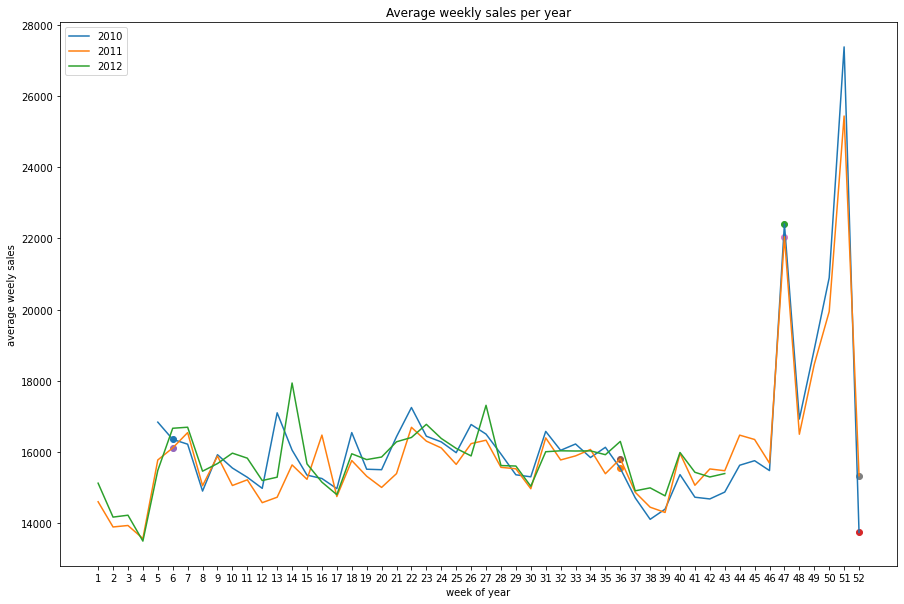

In [21]:
plt.figure(figsize=(15,10))
plt.plot(sales_2010,label = '2010')
plt.plot(sales_2011,label = '2011')
plt.plot(sales_2012,label = '2012')

for index in holiday_2010.values:
    plt.scatter(index, sales_2010[sales_2010.index == index].values)

for index in holiday_2011.values:
    plt.scatter(index, sales_2011[sales_2011.index == index].values)

# for index in holiday_2012.values:
#     plt.scatter(index, sales_2012[sales_2012.index == index].values)
    
plt.legend()
# plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.xlabel('week of year')
plt.ylabel("average weely sales")
plt.title("Average weekly sales per year")
plt.show()

#### check if sales are different in different stores/departments

In [23]:
print("There are " + str(len(full_train_df['Dept'].value_counts()))+" departments in total")
print("There are " + str(len(full_train_df['Store'].value_counts()))+" stores in total")

There are 81 departments in total
There are 45 stores in total


In [24]:
dept_sales = full_train_df["Weekly_Sales"].groupby(full_train_df["Dept"]).mean()
store_sales = full_train_df["Weekly_Sales"].groupby(full_train_df["Store"]).mean()

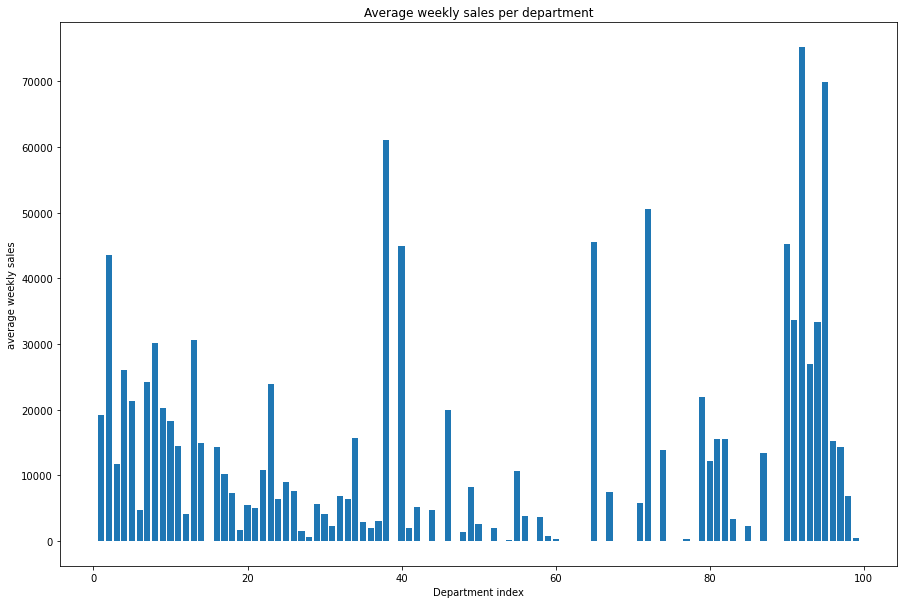

In [25]:
plt.figure(figsize=(15,10))
plt.bar(dept_sales.index, dept_sales.values)
plt.xlabel("Department index")
plt.ylabel("average weekly sales")
plt.title("Average weekly sales per department")
plt.show()

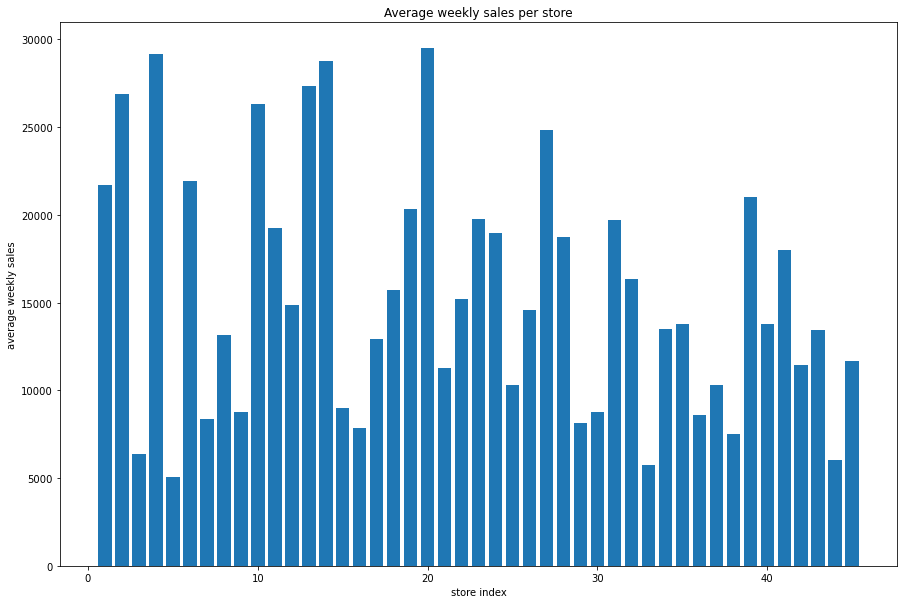

In [26]:
plt.figure(figsize=(15,10))
plt.bar(store_sales.index, store_sales.values)
plt.xlabel("store index")
plt.ylabel("average weekly sales")
plt.title("Average weekly sales per store")
plt.show()

clearly, there are differences between stores and departments

#### check if there is a difference in sales for holiday and not holiday

In [27]:
holiday_sales = full_train_df[['Weekly_Sales','IsHoliday']]

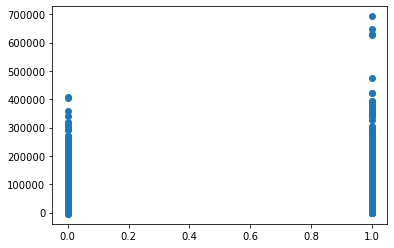

In [28]:
plt.scatter(holiday_sales['IsHoliday'], holiday_sales['Weekly_Sales'])
plt.show()

#### check relationship between temperature/fuel price/CPI/Unemplyment/Type/Size and weekly sales

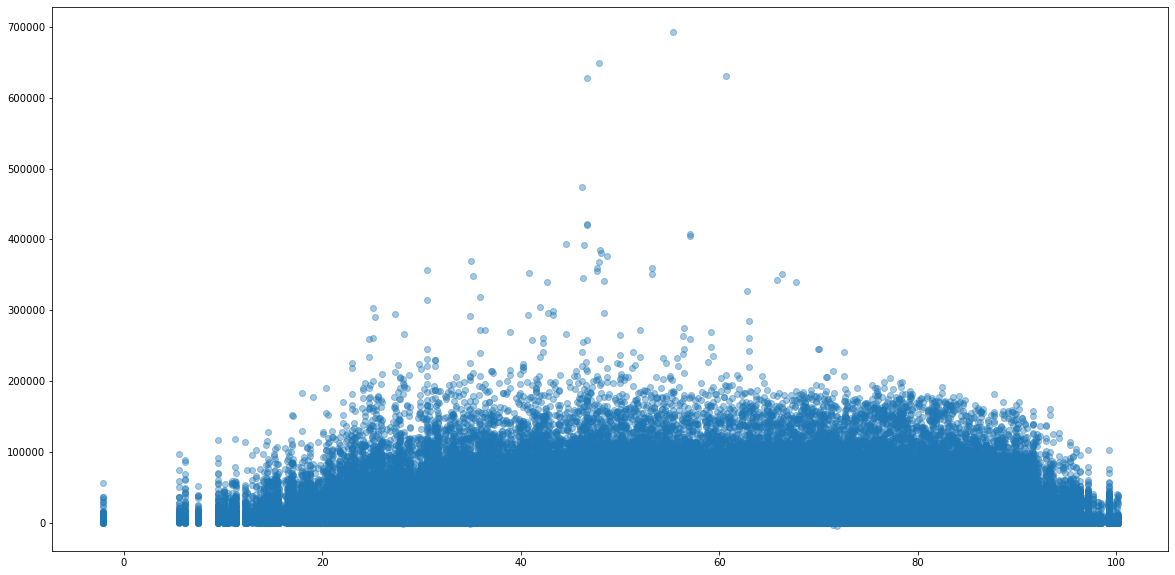

In [29]:
temp_sales = full_train_df[['Weekly_Sales','Temperature']]

plt.figure(figsize=(20,10))
plt.scatter(temp_sales['Temperature'], holiday_sales['Weekly_Sales'],alpha = 0.4)
plt.show()

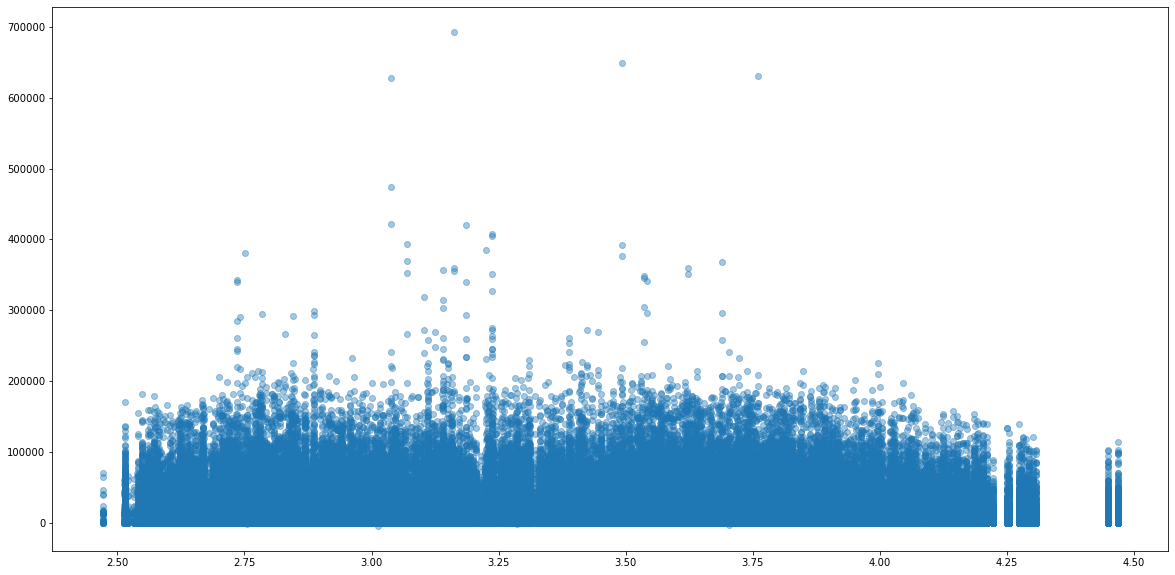

In [30]:
fuel_sales = full_train_df[['Weekly_Sales','Fuel_Price']]

plt.figure(figsize=(20,10))
plt.scatter(fuel_sales['Fuel_Price'], fuel_sales['Weekly_Sales'],alpha = 0.4)
plt.show()

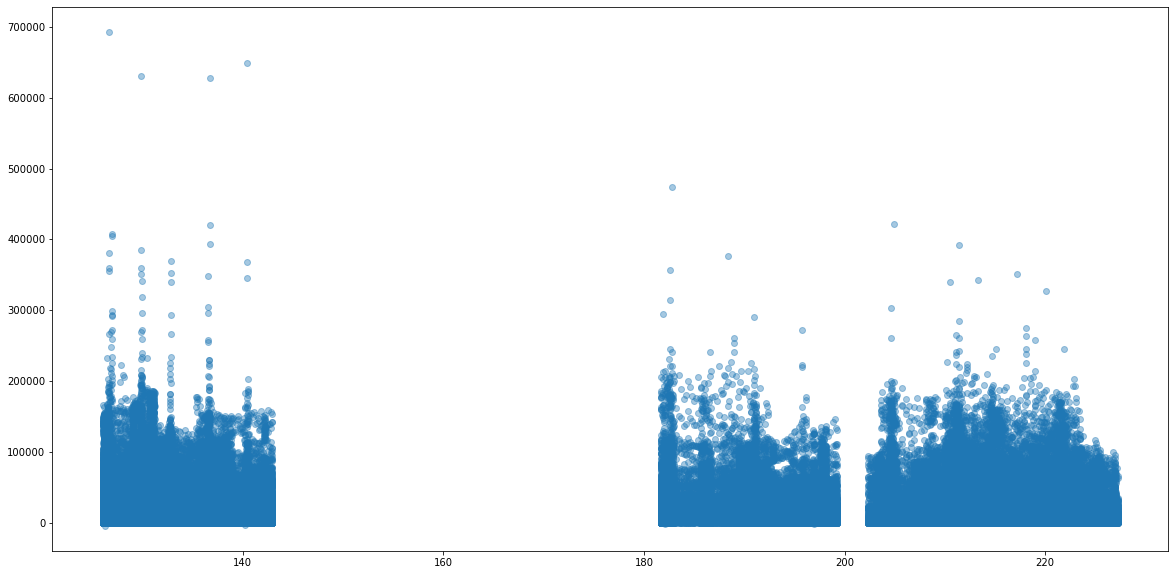

In [31]:
CPI_sales = full_train_df[['Weekly_Sales','CPI']]

plt.figure(figsize=(20,10))
plt.scatter(CPI_sales['CPI'], CPI_sales['Weekly_Sales'],alpha = 0.4)
plt.show()

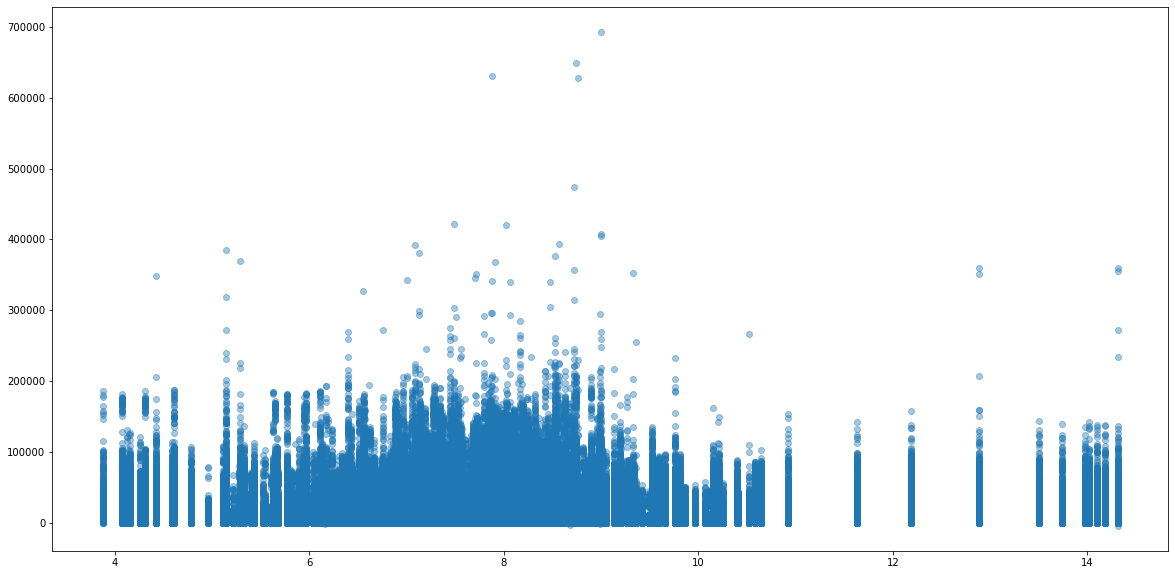

In [32]:
unem_sales = full_train_df[['Weekly_Sales','Unemployment']]

plt.figure(figsize=(20,10))
plt.scatter(unem_sales['Unemployment'], unem_sales['Weekly_Sales'],alpha = 0.4)
plt.show()

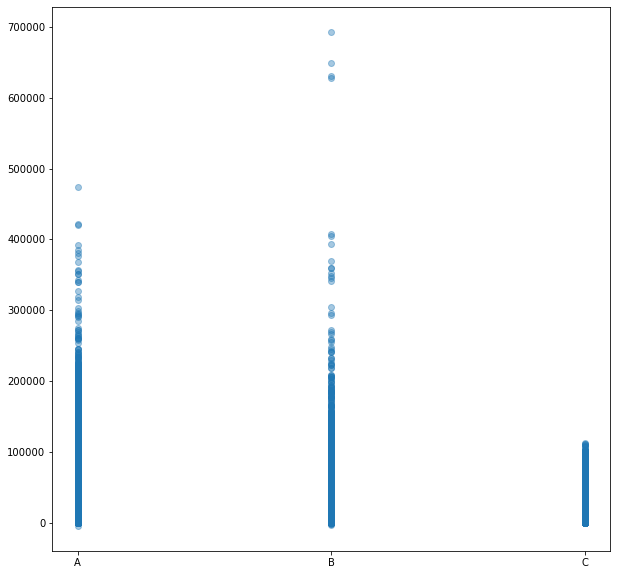

In [33]:
type_sales = full_train_df[['Weekly_Sales','Type']]

plt.figure(figsize=(10,10))
plt.scatter(type_sales['Type'], type_sales['Weekly_Sales'],alpha = 0.4)
plt.show()

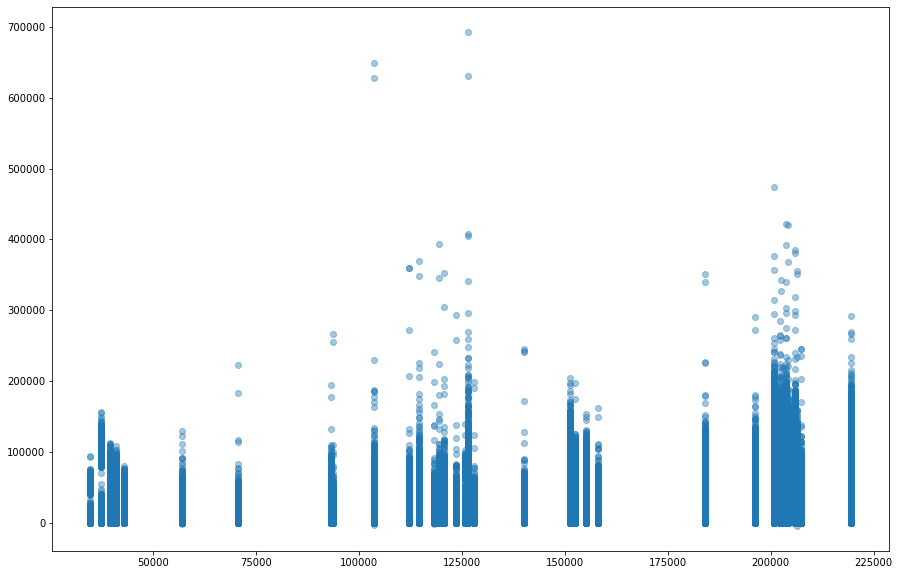

In [34]:
size_sales = full_train_df[['Weekly_Sales','Size']]

plt.figure(figsize=(15,10))
plt.scatter(size_sales['Size'], size_sales['Weekly_Sales'],alpha = 0.4)
plt.show()

#### Correlation between variables

In [35]:
# correlation among all variables
full_train_df.corr()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Year,Week,Type_A,Type_B,Type_C
Store,1.000000,0.024004,-0.085195,-0.000548,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552,-0.182881,0.002997,0.001031,-0.037119,-0.233461,0.439004
Dept,0.024004,1.000000,0.148032,0.000916,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837,-0.002966,0.003738,0.000882,0.012134,-0.029968,0.028324
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864,0.243828,-0.010111,0.027673,0.185417,-0.131219,-0.095388
IsHoliday,-0.000548,0.000916,0.012774,1.000000,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460,0.000593,-0.056746,0.128184,0.000451,0.000167,-0.001017
Temperature,-0.050097,0.004437,-0.002312,-0.155949,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730,-0.058313,0.065814,0.236276,0.024493,-0.109032,0.135651
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853,0.003361,0.779633,-0.031140,-0.037973,0.037317,0.002652
MarkDown1,-0.119588,-0.002426,0.085251,-0.035586,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285,0.345673,0.141332,-0.198076,0.177499,-0.013264,-0.274762
MarkDown2,-0.035173,0.000290,0.024130,0.334818,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940,0.108827,-0.222109,-0.000995,0.050829,-0.023181,-0.066634
MarkDown3,-0.031556,0.001784,0.060385,0.427960,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818,0.048913,-0.319162,0.196307,0.022686,0.003655,-0.046098
MarkDown4,-0.009941,0.004257,0.045414,-0.000562,-0.063947,-0.044986,0.819238,-0.007768,-0.071095,1.000000,0.107792,-0.049628,0.024963,0.168196,0.126469,-0.218477,0.091852,-0.063456,-0.088163


<AxesSubplot:>

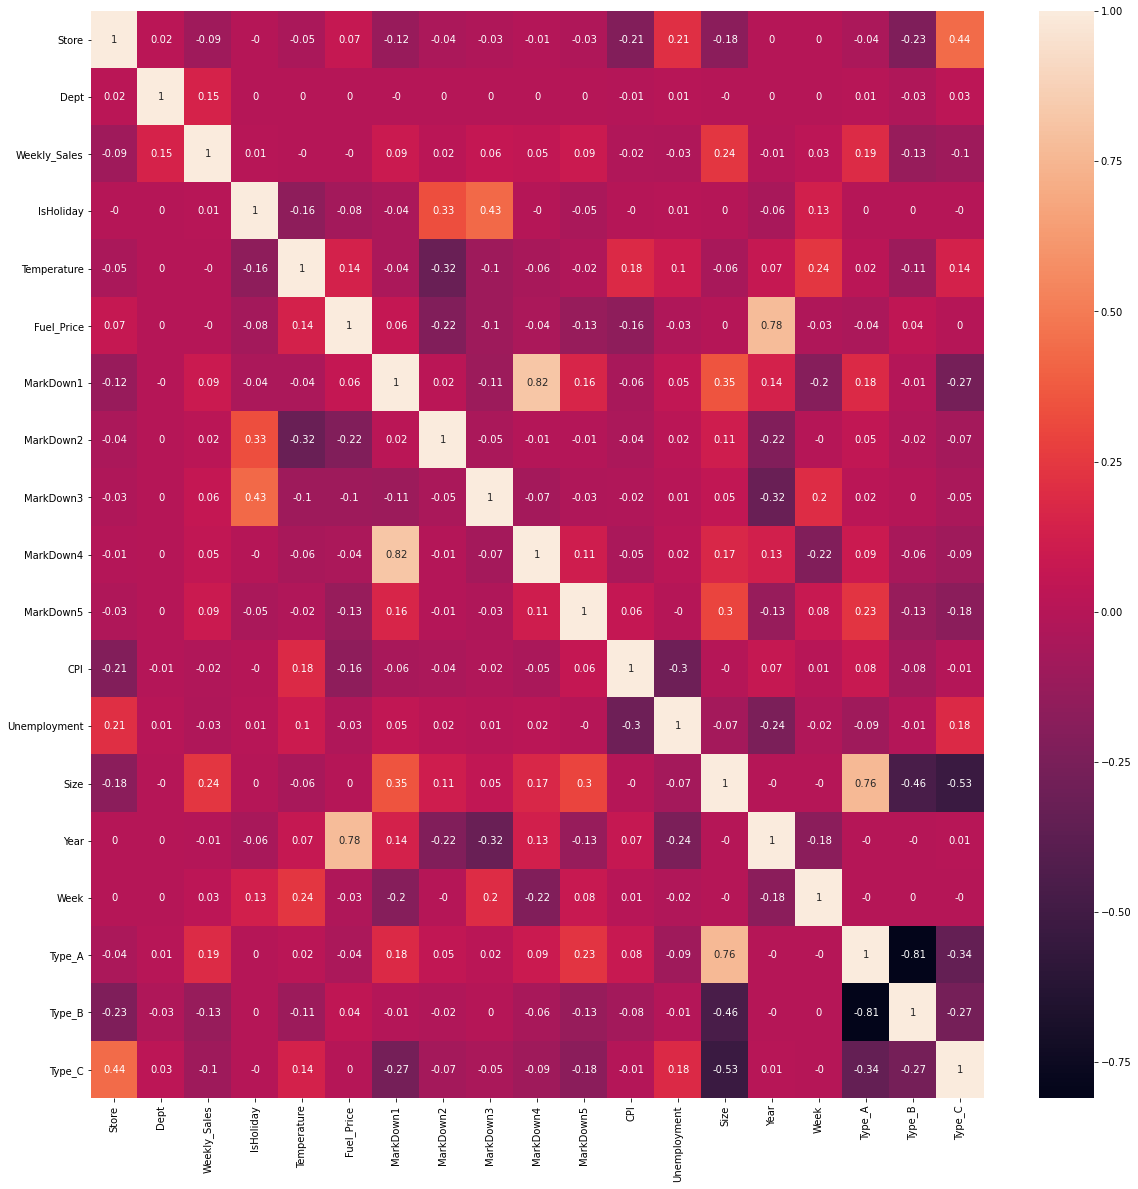

In [36]:
plt.subplots(figsize=(20, 20))

sns.heatmap(full_train_df.corr().round(2),annot=True)

We can see that Temperature, Fuel Price have very samll correlation with weekly sales. Also considering MarkDown1-5, CPI, and Unemployment contains a great amount of null values, we should also drop those features.

### Feature selection and output preprocessed dataset

In [37]:
full_train_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Year', 'Week',
       'Type_A', 'Type_B', 'Type_C'],
      dtype='object')

In [38]:
# full_train_df.Type = full_train_df.Type.apply(lambda x: 3 if x == 'A' else(2 if x == 'B' else 1))
# full_test_df.Type = full_test_df.Type.apply(lambda x: 3 if x == 'A' else(2 if x == 'B' else 1))

In [39]:
feature_list = ['Store', 'Dept', 'Weekly_Sales', 'IsHoliday',
                'Type_A','Type_B','Type_C', 'Size', 'Week',"Year"]
feature_list_test = ['Store', 'Dept',  'IsHoliday', 
                     'Type_A','Type_B','Type_C', 'Size', 'Week','Year','Date']
train_val = full_train_df[feature_list]
test = full_test_df[feature_list_test]

In [40]:
train_val.dtypes

Store             int64
Dept              int64
Weekly_Sales    float64
IsHoliday         int64
Type_A            uint8
Type_B            uint8
Type_C            uint8
Size              int64
Week              int64
Year              int64
dtype: object

In [41]:
train_val.to_csv('preprocessed_train_val.csv',index = 0)
test.to_csv('preprocessed_test.csv',index = 0)